# Keras - Emotion Detection in Images of Faces

In [1]:
# Import Libraries
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
import math
import h5py

In [3]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', 'r')
    train_set_x_orig = np.array(train_dataset['train_set_x'][:]) # Train Set Features
    train_set_y_orig = np.array(train_dataset['train_set_y'][:]) # Train Set Labels
    
    test_dataset = h5py.File('datasets/test_happy.h5', 'r')
    test_set_x_orig = np.array(test_dataset['test_set_x'][:]) # Test Set Features
    test_set_y_orig = np.array(test_dataset['test_set_y'][:]) # Test Set Labels
    
    classes = np.array(test_dataset['list_classes'][:]) # List the Classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize Image Vectors
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print("Number of training examples = " + str(X_train.shape[0]))
print("Number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

Number of training examples = 600
Number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [5]:
Input(X_train.shape[1:4])

<tf.Tensor 'input_1:0' shape=(None, 64, 64, 3) dtype=float32>

In [6]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguements:
    input_shape -- shape of the images of the dataset
    (height, width, channels) as a tuple.
    Note that this does not include the 'batch' as a dimension.
    If you have a batch like 'X_train', then you provide the input_shape using
    X_train.shape[1:]
    
    Returns:
    model -- a Model() instance in Keras
    """
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3, 3))(X_input)
    
    X = Conv2D(32, (7,7), strides = (1, 1), name='conv0')(X)
    X = BatchNormalization(axis = 3, name='bn0')(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'HappyModel')
    
    return model

In [7]:
print("X_train shape(1:4): " + str(X_train.shape[1:4]))
happyModel = HappyModel(X_train.shape[1:4])

X_train shape(1:4): (64, 64, 3)


In [8]:
happyModel.compile(optimizer="Adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [9]:
happyModel.fit(x = X_train, y = Y_train, epochs=20, batch_size=50)

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 1.9315 - accuracy: 0.6000
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.4818 - accuracy: 0.8100
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.2605 - accuracy: 0.8967
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.1812 - accuracy: 0.9267
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.1266 - accuracy: 0.9567
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.1112 - accuracy: 0.9567
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1455 - accuracy: 0.9433
Epoch 8/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0986 - accuracy: 0.9700
Epoch 9/20
600/600 [==============================] - 4s 6ms/step - loss: 0.1332 - accuracy: 0.9500
Epoch 10/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0805 - accuracy: 0.976

In [10]:
preds = happyModel.evaluate(x = X_test, y = Y_test)

print()
print("Loss = "+str(preds[0]))
print("Test Accuracy = "+str(preds[1]))

150/150 [==============================] - 0s 3ms/step

Loss = 0.2263362048069636
Test Accuracy = 0.95333331823349


[[0.]]


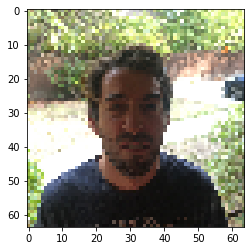

In [11]:
img_path = 'images/my_image.jpg'
img = image.load_img(img_path, target_size = (64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

In [12]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0

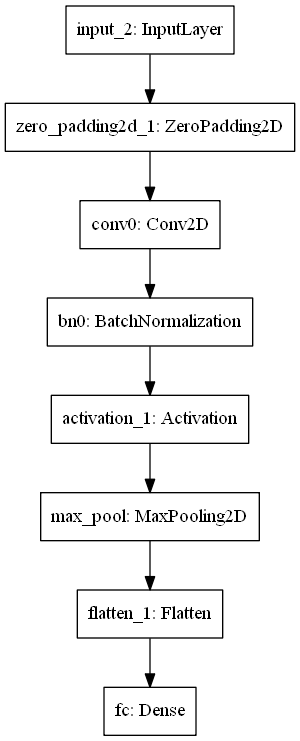

In [13]:
plot_model(happyModel, to_file='HappyModel.png')

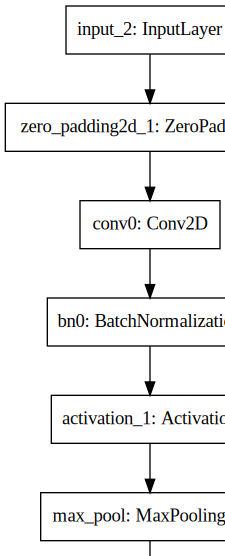

In [15]:
SVG(model_to_dot(happyModel).create(prog='dot.exe', format='svg'))